# DATA 3461 - Lab 6 (KDD Dataset/1-5)
### Darlene Eligado 
### ID 1001889134

### This file only has exercises regarding the KDD dataset (exercises 1-5). I will be making a new file for the SA dataset which will contain exercises 6-8.

-----

Scikit learn provides a large variety of algorithms for some common Machine Learning tasks, such as:

* Classification
* Regression
* Clustering
* Feature Selection
* Anomaly Detection

It also provides some datasets that you can use to test these algorithms:

* Classification Datasets:
    * Breast cancer wisconsin
    * Iris plants (3-classes)
    * Optical recognition of handwritten digits (10-classes)
    * Wine (n-classes)

* Regression Datasets: 
    * Boston house prices 
    * Diabetes
    * Linnerrud (multiple regression)
    * California Housing

* Image: 
    * The Olivetti faces
    * The Labeled Faces in the Wild face recognition
    * Forest covertypes

* NLP:
    * News group
    * Reuters Corpus Volume I 

* Other:
    * Kddcup 99- Intrusion Detection

## Exercises

1. Use the full [Kddcup](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) dataset to compare classification performance of 3 different classifiers. 
    * Separate the data into train, validation, and test. 
    * Use accuracy as the metric for assessing performance. 
    * For each classifier, identify the hyperparameters. Perform optimization over at least 2 hyperparameters.   
    * Compare the performance of the optimal configuration of the classifiers.

2. Pick the best algorithm in question 1. Create an ensemble of at least 25 models, and use them for the classification task. Identify the top and bottom 10% of the data in terms of uncertainty of the decision.

3. Use 2 different feature selection algorithm to identify the 10 most important features for the task in question 1. Retrain classifiers in question 1 with just this subset of features and compare performance.

4. Use the same data, removing the labels, and compare performance of 3 different clustering algorithms. Can you find clusters for each of the classes in question 1? 

5. Can you identify any clusters within the top/botton 10% identified in 2. What are their characteristics?

6. Use the "SA" dataset to compare the performance of 3 different anomaly detection algorithms.

7. Create a subsample of 250 datapoints, redo question 6, using Leave-one-out as the method of evaluation.

8. Use the feature selection algorithm to identify the 5 most important features for the task in question 6, for each algorithm. Does the anomaly detection improve using less features?

## Quick look at the data

In [2]:
from sklearn.datasets import fetch_kddcup99
D=fetch_kddcup99()

In [20]:
dir(D)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [16]:
print(D["DESCR"])

.. _kddcup99_dataset:

Kddcup 99 dataset
-----------------

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [2]_. The artificial data (described on the `dataset's
homepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was
generated using a closed network and hand-injected attacks to produce a
large number of different types of attack with normal activity in the
background. As the initial goal was to produce a large training set for
supervised learning algorithms, there is a large proportion (80.1%) of
abnormal data which is unrealistic in real world, and inappropriate for
unsupervised anomaly detection which aims at detecting 'abnormal' data, i.e.:

* qualitatively different from normal data
* in large minority among the observations.

We thus transform the KDD Data set into two different data sets: SA and SF.

* SA is obtained by simply selecting all

In [8]:
dir(D)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [17]:
import numpy as np
np.unique(D["target"])

array([b'back.', b'buffer_overflow.', b'ftp_write.', b'guess_passwd.',
       b'imap.', b'ipsweep.', b'land.', b'loadmodule.', b'multihop.',
       b'neptune.', b'nmap.', b'normal.', b'perl.', b'phf.', b'pod.',
       b'portsweep.', b'rootkit.', b'satan.', b'smurf.', b'spy.',
       b'teardrop.', b'warezclient.', b'warezmaster.'], dtype=object)

In [21]:
len(np.unique(D["target"]))

23

In [13]:
D["feature_names"]

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

----

# **KDD EDA, Pre-processing & Transformation**

- Turned continous columns numeric
- Encoded target column 
- Also encoded the rest of the object columns

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_kddcup99

In [2]:
# load in data
D = fetch_kddcup99()
df=pd.DataFrame(D.data, columns=D.feature_names)

In [3]:
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
5,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
6,0,b'tcp',b'http',b'SF',212,1940,0,0,0,0,...,1,69,1.0,0.0,1.0,0.04,0.0,0.0,0.0,0.0
7,0,b'tcp',b'http',b'SF',159,4087,0,0,0,0,...,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0
8,0,b'tcp',b'http',b'SF',210,151,0,0,0,0,...,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0
9,0,b'tcp',b'http',b'SF',212,786,0,0,0,1,...,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0


In [4]:
df["target"]=D.target
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'
5,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'
6,0,b'tcp',b'http',b'SF',212,1940,0,0,0,0,...,69,1.0,0.0,1.0,0.04,0.0,0.0,0.0,0.0,b'normal.'
7,0,b'tcp',b'http',b'SF',159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,b'normal.'
8,0,b'tcp',b'http',b'SF',210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,b'normal.'
9,0,b'tcp',b'http',b'SF',212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,b'normal.'


In [5]:
'''
# Check data types of the columns
data_types = df.dtypes

# Identify continuous variables (float64 or int64)
continuous_vars = data_types[(data_types == 'float64') | (data_types == 'int64')].index.tolist()

print("Continuous Variables:")
print(continuous_vars)

this didnt work so had to do it manually :')
'''

# list of continuous columns
continuous_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 
    'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 
    'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
]

# convert continuous columns to numeric
for column in continuous_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [6]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                            object
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                       object
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                   object
is_guest_login                  object
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
# looking at target 
# print unique values in the target column
print(df['target'].unique())

[b'normal.' b'buffer_overflow.' b'loadmodule.' b'perl.' b'neptune.'
 b'smurf.' b'guess_passwd.' b'pod.' b'teardrop.' b'portsweep.' b'ipsweep.'
 b'land.' b'ftp_write.' b'back.' b'imap.' b'satan.' b'phf.' b'nmap.'
 b'multihop.' b'warezmaster.' b'warezclient.' b'spy.' b'rootkit.']


In [8]:
# encode target column by unique values

df["target"]=df["target"].str.decode("utf-8")

# mapping based on the unique values
label_mapping = {
    "smurf.": 0,
    "neptune.": 1,
    "normal.": 2,
    "back.": 3,
    "satan.": 4,
    "ipsweep.": 5,
    "portsweep.": 6,
    "warezclient.": 7,
    "teardrop.": 8,
    "pod.": 9,
    "nmap.": 10,
    "guess_passwd.": 11,
    "buffer_overflow.": 12,
    "land.": 13,
    "warezmaster.": 14,
    "imap.": 15,
    "rootkit.": 16,
    "loadmodule.": 17,
    "ftp_write.": 18,
    "multihop.": 19,
    "phf.": 20,
    "perl.": 21,
    "spy.": 22
}

# apply mapping to target col
df["target"]=df["target"].replace(label_mapping)

In [9]:
# print the distribution of the target column
df['target'].value_counts()

target
0     280790
1     107201
2      97278
3       2203
4       1589
5       1247
6       1040
7       1020
8        979
9        264
10       231
11        53
12        30
13        21
14        20
15        12
16        10
17         9
18         8
19         7
20         4
21         3
22         2
Name: count, dtype: int64

In [10]:
# now deal w/ other columns

# categorical
object_columns = df.select_dtypes(include='object').columns
print(object_columns)

Index(['protocol_type', 'service', 'flag', 'land', 'logged_in',
       'is_host_login', 'is_guest_login'],
      dtype='object')


In [11]:
# now display unique values for each object column
for column in object_columns:
    print(f"Value counts for '{column}':\n{df[column].value_counts()}\n")

Value counts for 'protocol_type':
protocol_type
b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: count, dtype: int64

Value counts for 'service':
service
b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'pm_dump'         1
b'tftp_u'          1
b'red_i'           1
Name: count, Length: 66, dtype: int64

Value counts for 'flag':
flag
b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: count, dtype: int64

Value counts for 'land':
land
0    493999
1        22
Name: count, dtype: int64

Value counts for 'logged_in':
logged_in
0    420784
1     73237
Name: count, dtype: int64

Value counts for 'is_host_login':
is_host_login
0    494021
Name: count, dtype: int64

Value counts for 'is_guest_lo

In [12]:
# i will now try to encode all of this >.<

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# protocol_type
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])

# view the mapping of the original values to their encoded values
protocol_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(protocol_type_mapping)

# service
df['service'] = label_encoder.fit_transform(df['service'])

# view the mapping of the original values to their encoded values
service_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\n",service_mapping)

# flag
df['flag'] = label_encoder.fit_transform(df['flag'])

# view the mapping of the original values to their encoded values
flag_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\n",flag_mapping)

{b'icmp': 0, b'tcp': 1, b'udp': 2}

 {b'IRC': 0, b'X11': 1, b'Z39_50': 2, b'auth': 3, b'bgp': 4, b'courier': 5, b'csnet_ns': 6, b'ctf': 7, b'daytime': 8, b'discard': 9, b'domain': 10, b'domain_u': 11, b'echo': 12, b'eco_i': 13, b'ecr_i': 14, b'efs': 15, b'exec': 16, b'finger': 17, b'ftp': 18, b'ftp_data': 19, b'gopher': 20, b'hostnames': 21, b'http': 22, b'http_443': 23, b'imap4': 24, b'iso_tsap': 25, b'klogin': 26, b'kshell': 27, b'ldap': 28, b'link': 29, b'login': 30, b'mtp': 31, b'name': 32, b'netbios_dgm': 33, b'netbios_ns': 34, b'netbios_ssn': 35, b'netstat': 36, b'nnsp': 37, b'nntp': 38, b'ntp_u': 39, b'other': 40, b'pm_dump': 41, b'pop_2': 42, b'pop_3': 43, b'printer': 44, b'private': 45, b'red_i': 46, b'remote_job': 47, b'rje': 48, b'shell': 49, b'smtp': 50, b'sql_net': 51, b'ssh': 52, b'sunrpc': 53, b'supdup': 54, b'systat': 55, b'telnet': 56, b'tftp_u': 57, b'tim_i': 58, b'time': 59, b'urh_i': 60, b'urp_i': 61, b'uucp': 62, b'uucp_path': 63, b'vmnet': 64, b'whois': 65}

 {b'O

In [13]:
# now encoding the binary columns to integers

binary_columns = ['land', 'logged_in', 'is_host_login', 'is_guest_login']
df[binary_columns] = df[binary_columns].astype(int)

# Verify encoding
for column in binary_columns:
    print(f"'{column}': {df[column].unique()}")

'land': [0 1]
'logged_in': [1 0]
'is_host_login': [0]
'is_guest_login': [0 1]


In [14]:
df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

-----

# **Exercise 1**

1. Use the full [Kddcup](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) dataset to compare classification performance of 3 different classifiers. 
    * Separate the data into train, validation, and test. 
    * Use accuracy as the metric for assessing performance. 
    * For each classifier, identify the hyperparameters. Perform optimization over at least 2 hyperparameters.   
    * Compare the performance of the optimal configuration of the classifiers.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # tried to do svc but took way too long
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### **Splitting the data 80/10/10**

In [16]:
X=df.drop(columns=["target"], axis=1)
y=df["target"]

# 80/10/10 split 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### **Algorithms I used:**

- Random Forest
- Gradient Boosting
- Logistic Regression

In [19]:
# classifiers
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Random Forest
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Gradient Boosting
gb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

# Logistic Regression
lr_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

In [20]:
# hyperparameter tuning

def tune_models(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# tune da models
best_rf, best_params_rf, best_score_rf = tune_models(rf, rf_grid)
best_gb, best_params_gb, best_score_gb = tune_models(gb, gb_grid)
best_lr, best_params_lr, best_score_lr = tune_models(log_reg, lr_grid)

# print accuracy
rf_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
print("Random Forest - Best Parameters:", best_params_rf, "Validation Accuracy:", best_score_rf, "Test Accuracy:", rf_accuracy)

gb_accuracy = accuracy_score(y_test, best_gb.predict(X_test))
print("\nGradient Boosting - Best Parameters:", best_params_gb, "Validation Accuracy:", best_score_gb, "Test Accuracy:", gb_accuracy)

lr_accuracy = accuracy_score(y_test, best_lr.predict(X_test))
print("\nLogistic Regression - Best Parameters:", best_params_lr, "Validation Accuracy:", best_score_lr, "Test Accuracy:", lr_accuracy)

/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

Random Forest - Best Parameters: {'max_depth': 20, 'n_estimators': 200} Validation Accuracy: 0.9997242014749395 Test Accuracy: 0.9997368580855414

Gradient Boosting - Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200} Validation Accuracy: 0.9986867944026251 Test Accuracy: 0.9988057405420724

Logistic Regression - Best Parameters: {'C': 0.1, 'solver': 'liblinear'} Validation Accuracy: 0.9926647730450006 Test Accuracy: 0.9890290063356476


## **Summary & Comparison of Results**

**Random Forest**
- Best Parameters: {'max_depth': 20, 'n_estimators': 200}
- Validation Accuracy: 0.9997242014749395
- Test Accuracy : 0.9997368580855414

**Gradient Boosting**
- Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
- Validation Accuracy: 0.9986867944026251
- Test Accuracy: 0.9988057405420724

**Logistic Regression**
- Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
- Validation Accuracy: 0.9926647730450006
- Test Accuracy: 0.9890290063356476

So out of the 3, **Random Forest** performed the best on both the validation & test datasets

-------

# **Exercise 2**

Pick the best algorithm in question 1. Create an ensemble of at least 25 models, and use them for the classification task. Identify the top and bottom 10% of the data in terms of uncertainty of the decision.


**Random Forest** performed the best out of the 3
- Best Parameters: {'max_depth': 20, 'n_estimators': 200}
- Validation Accuracy: 0.9997242014749395
- Test Accuracy : 0.9997368580855414

**I will be using the bootstrapping method to do exercise 2**

In [22]:
from sklearn.utils import resample

# ensemble size
n_models = 25
models = []

# now train ea. model w/ bootstrap sampling
for _ in range(n_models):
    X_bootstrap, y_bootstrap = resample(X_train, y_train, replace=True, n_samples=len(X_train), random_state=None)
    model = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
    model.fit(X_bootstrap, y_bootstrap)
    models.append(model)
    
    
all_classes = np.unique(y_train)

# store prediction probabilities 
probs = []

for model in models:
    # probs for test set
    prob = model.predict_proba(X_test)
    
    if prob.shape[1] != len(all_classes):
        # array w/ zeros for missing classes
        prob_fixed = np.zeros((prob.shape[0], len(all_classes)))
        for i, cls in enumerate(model.classes_):
            prob_fixed[:, np.where(all_classes == cls)[0][0]] = prob[:, i]
        probs.append(prob_fixed)
    else:
        probs.append(prob)

# convert probs
probs = np.array(probs)

In [24]:
# find avg probabilities in models
avg_probs = np.mean(probs, axis=0)

# calc uncertainty w/ entropy (-sum(p * log(p))) 
uncertainty = -np.sum(avg_probs * np.log(avg_probs + 1e-10), axis=1)

# thresholds for top & bottom 10% uncertainty
threshold_top = np.percentile(uncertainty, 90)   
threshold_bottom = np.percentile(uncertainty, 10) 

# find top and bottom uncertainty samples
top_10_percent_indices = np.where(uncertainty >= threshold_top)[0]
bottom_10_percent_indices = np.where(uncertainty <= threshold_bottom)[0]

# indices
print("Top 10% indices based on uncertainty:", top_10_percent_indices)
print("Bottom 10% indices based on uncertainty:", bottom_10_percent_indices)

# count
print("\n\nCount of Top 10% uncertain samples:", len(top_10_percent_indices))
print("Count of Bottom 10% uncertain samples:", len(bottom_10_percent_indices))

Top 10% indices based on uncertainty: [    4    19    28 ... 49359 49370 49371]
Bottom 10% indices based on uncertainty: [    1     2     3 ... 49400 49401 49402]


Count of Top 10% uncertain samples: 4941
Count of Bottom 10% uncertain samples: 39090


-----

# **Exercise 3**

Use 2 different feature selection algorithm to identify the 10 most important features for the task in question 1. Retrain classifiers in question 1 with just this subset of features and compare performance.

Choosen feature selection algorithms: 
- **recursive feature elimination (RFE)**: this recursively removes the least important features based on model performance
- **feature importance from random forests**: this uses the feature importance scores taken from the trained ransom forest model

In [26]:
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

# RFE
model_rfe = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model_rfe, n_features_to_select=10)
rfe.fit(X_train, y_train)
rfe_features = np.array(X.columns)[rfe.support_]

# rf feature importance
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]
rf_features = np.array(X.columns)[indices]

In [31]:
# combine selected features
combined_features = np.unique(np.concatenate((rfe_features, rf_features)))

# train classifiers w/ selected features
X_train_rfe = X_train[rfe_features]
X_test_rfe = X_test[rfe_features]

X_train_rf = X_train[rf_features]
X_test_rf = X_test[rf_features]

X_train_combined = X_train[combined_features]  
X_test_combined = X_test[combined_features]

In [34]:
# train & evaluate models 

#RFE
model_rfe_final = RandomForestClassifier(random_state=42)
model_rfe_final.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe_final.predict(X_test_rfe)
print("\n\nFeatures selected by RFE:", rfe_features)
print("\nPerformance using RFE selected features:")
print(classification_report(y_test, y_pred_rfe))
print("\nAccuracy:", accuracy_score(y_test, y_pred_rfe))


# feature importance
model_rf_final = RandomForestClassifier(random_state=42)
model_rf_final.fit(X_train_rf, y_train)
y_pred_rf = model_rf_final.predict(X_test_rf)
print("\n\nFeatures selected by Random Forest:", rf_features)
print("\nPerformance using Random Forest feature importance selected features:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))

# combined 
model_combined_final = RandomForestClassifier(random_state=42)
model_combined_final.fit(X_train_combined, y_train)
y_pred_combined = model_combined_final.predict(X_test_combined)
print("\n\nCombined selected features:", combined_features)
print("\nPerformance using combined features from RFE and Random Forest feature importance:")
print(classification_report(y_test, y_pred_combined))
print("\nAccuracy:", accuracy_score(y_test, y_pred_combined))




Features selected by RFE: ['protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes' 'count'
 'srv_count' 'same_srv_rate' 'diff_srv_rate' 'dst_host_same_src_port_rate']

Performance using RFE selected features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28241
           1       1.00      1.00      1.00     10585
           2       1.00      1.00      1.00      9680
           3       1.00      1.00      1.00       216
           4       0.99      0.99      0.99       152
           5       0.90      0.99      0.94       145
           6       1.00      0.99      1.00       135
           7       0.99      0.97      0.98        91
           8       1.00      1.00      1.00       108
           9       0.95      1.00      0.97        19
          10       1.00      0.40      0.57        25
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          14       1.00      1.

/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res



Features selected by Random Forest: ['srv_count' 'src_bytes' 'count' 'service' 'dst_host_same_src_port_rate'
 'protocol_type' 'same_srv_rate' 'flag' 'dst_host_srv_count'
 'diff_srv_rate']

Performance using Random Forest feature importance selected features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28241
           1       1.00      1.00      1.00     10585
           2       1.00      1.00      1.00      9680
           3       1.00      1.00      1.00       216
           4       0.99      0.99      0.99       152
           5       0.92      0.97      0.94       145
           6       1.00      1.00      1.00       135
           7       0.95      0.97      0.96        91
           8       1.00      1.00      1.00       108
           9       1.00      1.00      1.00        19
          10       0.71      0.48      0.57        25
          11       1.00      1.00      1.00         2
          12       1.00      1.00   

/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res



Combined selected features: ['count' 'diff_srv_rate' 'dst_bytes' 'dst_host_same_src_port_rate'
 'dst_host_srv_count' 'flag' 'protocol_type' 'same_srv_rate' 'service'
 'src_bytes' 'srv_count']

Performance using combined features from RFE and Random Forest feature importance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28241
           1       1.00      1.00      1.00     10585
           2       1.00      1.00      1.00      9680
           3       1.00      1.00      1.00       216
           4       0.99      0.99      0.99       152
           5       0.92      0.97      0.94       145
           6       1.00      1.00      1.00       135
           7       0.99      0.97      0.98        91
           8       1.00      1.00      1.00       108
           9       0.95      1.00      0.97        19
          10       0.71      0.48      0.57        25
          11       1.00      1.00      1.00         2
          12       

/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/darleneeligado/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

## **Summary of results**

**RFE**
- Features: ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',  'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate',  'dst_host_same_src_port_rate']
- Accuracy: 0.9994129911138999

**Random Forest Feature Importance**
- Features: ['srv_count' 'src_bytes' 'count' 'service' 'dst_host_same_src_port_rate'
 'protocol_type' 'same_srv_rate' 'flag' 'dst_host_srv_count'
 'diff_srv_rate']
- Accuracy: 0.9993320243709897

**Combined**
- Features: ['count', 'diff_srv_rate', 'dst_bytes',  'dst_host_same_src_port_rate', 'dst_host_srv_count',  'flag', 'protocol_type', 'same_srv_rate',  'service', 'src_bytes', 'srv_count']
- Accuracy: 0.9994129911138999

-----

# **Exercise 4**

Use the same data, removing the labels, and compare performance of 3 different clustering algorithms. Can you find clusters for each of the classes in question 1? 

Algorithms used:
- K-Means
- Gaussian Mixture Models (GMM)
- Mini-Batch K-Means

Attempted: 
- Mean Shift

In [40]:
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [46]:
from sklearn.cluster import MiniBatchKMeans

In [41]:
# standardize the data
X_scaled = StandardScaler().fit_transform(X)

n_clusters = 3

In [47]:
# mini batch
mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=100)
mini_batch_labels = mini_batch_kmeans.fit_predict(X_scaled)
mini_batch_silhouette = silhouette_score(X_scaled, mini_batch_labels)
print("Mini Batch Silhouette Score:", mini_batch_silhouette)

Mini Batch Silhouette Score: 0.6369683797331506


In [42]:
# k-means 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

K-Means Silhouette Score: 0.6349373151184279


In [43]:
# GMM
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
print("GMM Silhouette Score:", gmm_silhouette)

GMM Silhouette Score: 0.5880209850196322


In [45]:
'''
# mean shift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_scaled)
mean_shift_silhouette = silhouette_score(X_scaled, mean_shift_labels)
print("Mean Shift Silhouette Score:", mean_shift_silhouette)

this did not work... 
'''

KeyboardInterrupt: 

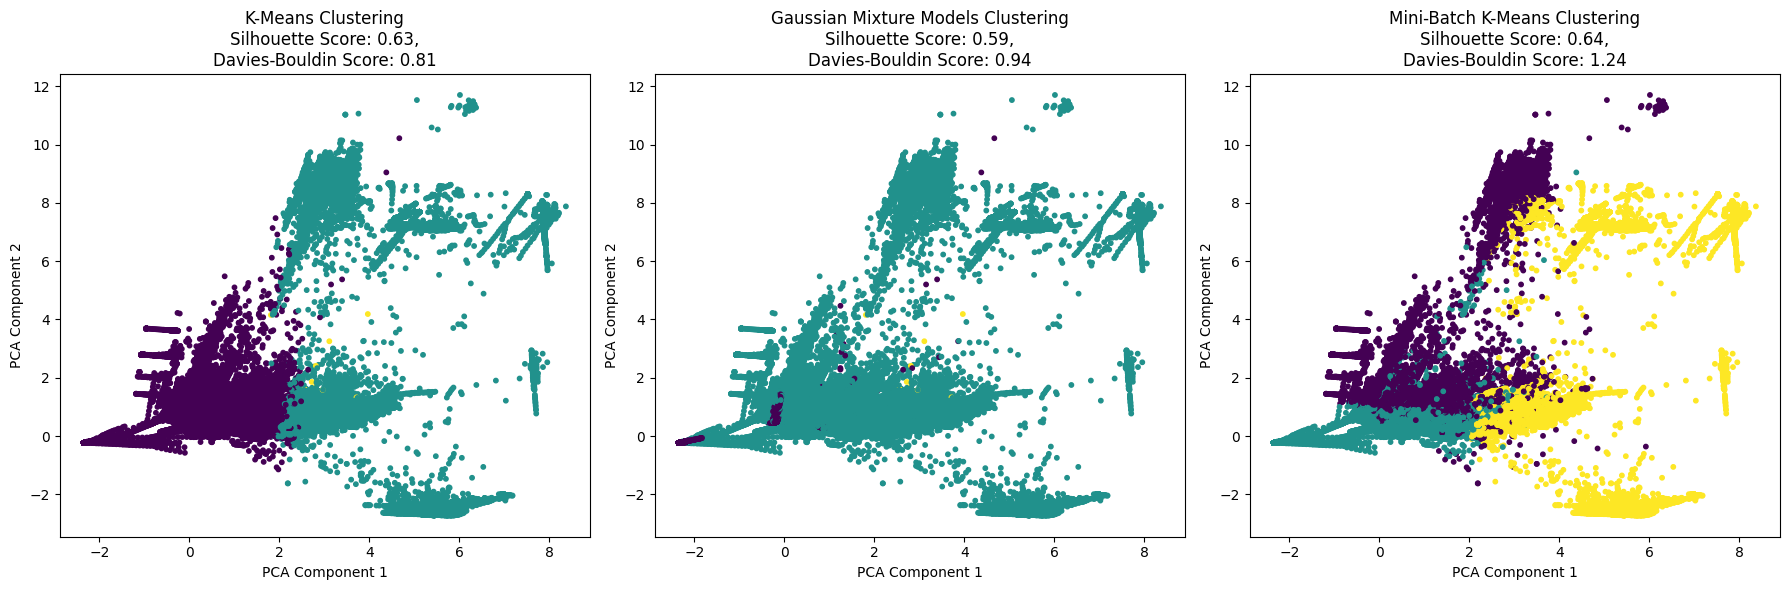

In [49]:
# some visualization to visualize clusters

# calc the davies-bouldin scores
'''
helpful because it provides a quantitative measure of clustering quality by evaluating the average similarity ratio of each cluster with its most similar cluster
'''

kmeans_davies = davies_bouldin_score(X_scaled, kmeans_labels)
gmm_davies = davies_bouldin_score(X_scaled, gmm_labels)
mini_batch_davies = davies_bouldin_score(X_scaled, mini_batch_labels)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(18, 6))

# k-means
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=10)
plt.title(f'K-Means Clustering\nSilhouette Score: {kmeans_silhouette:.2f},\nDavies-Bouldin Score: {kmeans_davies:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# gmm
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', marker='o', s=10)
plt.title(f'Gaussian Mixture Models Clustering\nSilhouette Score: {gmm_silhouette:.2f},\nDavies-Bouldin Score: {gmm_davies:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# mini-batch
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mini_batch_labels, cmap='viridis', marker='o', s=10)
plt.title(f'Mini-Batch K-Means Clustering\nSilhouette Score: {mini_batch_silhouette:.2f},\nDavies-Bouldin Score: {mini_batch_davies:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

### **Exercise 4 Summary:**

**K-Means Clustering**
- Shilhouette Score: 0.63
- Davies-Bouldin Score: 0.81

**GMM**
- Shilhouette Score: 0.59
- Davies-Bouldin Score: 0.94

**Mini-Bactch K-Means**
- Shilhouette Score: 0.64
- Davies-Bouldin Score: 1.24


Sooooooo... overall, **K-Means appears to provide the most effective** clustering based on these metrics.

-----

# **Exercise 5**

Can you identify any clusters within the top/botton 10% identified in 2. What are their characteristics?

In [52]:
X_test_array = np.array(X_test)  # convert to NumPy array from DataFrame

# filter top & bottom 10% uncertain samples
X_top_uncertainty = X_test.iloc[top_10_percent_indices] # top_10_percent_indices from exercise 2
X_bottom_uncertainty = X_test.iloc[bottom_10_percent_indices] # bottom_10_percent_indices from exercise 2

n_clusters = 3

# a function to cluster then summarize its characteristics
def run_clustering(X_data, n_clusters, data_label):
    # k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_data)
    
    # mini-batch 
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=100)
    mini_batch_labels = mini_batch_kmeans.fit_predict(X_data)
    
    # gmm
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(X_data)
    
    # results
    print(f"\n--- Clustering Characteristics for {data_label} ---")
    
    # cluster sizes
    print(f"\nK-Means Cluster Sizes: {np.bincount(kmeans_labels)}")
    print(f"Mini-Batch K-Means Cluster Sizes: {np.bincount(mini_batch_labels)}")
    print(f"GMM Cluster Sizes: {np.bincount(gmm_labels)}")
    
    # cluster's centroids 
    kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    gmm_means = pd.DataFrame(gmm.means_, columns=X.columns)
    
    print(f"\nK-Means Centroids:\n{kmeans_centroids}")
    print(f"\nGMM Means:\n{gmm_means}")

In [53]:
# top 10% uncertainty samples
run_clustering(X_top_uncertainty, n_clusters, "Top 10% Uncertain Samples")

# bottom 10% uncertainty samples
run_clustering(X_bottom_uncertainty, n_clusters, "Bottom 10% Uncertain Samples")


--- Clustering Characteristics for Top 10% Uncertain Samples ---

K-Means Cluster Sizes: [4934    3    4]
Mini-Batch K-Means Cluster Sizes: [ 144  331 4466]
GMM Cluster Sizes: [4934    3    4]

K-Means Centroids:
      duration  protocol_type   service      flag     src_bytes     dst_bytes  \
0   503.089988        1.30908  32.73409  8.476084  2.043775e+03  1.994007e+03   
1  5043.000000        1.00000  19.00000  9.000000  5.133659e+06  0.000000e+00   
2  1308.250000        1.00000  37.50000  9.000000  3.120000e+02  3.808029e+06   

   land  wrong_fragment  urgent       hot  ...  dst_host_count  \
0   0.0    5.127685e-02     0.0  0.256587  ...      163.306445   
1   0.0    6.938894e-18     0.0  3.333333  ...        6.666667   
2   0.0    0.000000e+00     0.0  0.000000  ...      151.500000   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0          130.135387                 0.63058                0.135705   
1           39.666667                 1.00000     

----
## Exercises 6-8 will be in a new file